<a href="https://colab.research.google.com/github/rupakchoppala/Pavan-Landing-page/blob/main/hang_gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ STEP 1: Setup Kaggle API and install required packages
!pip install -q kaggle opencv-python seaborn

# ✅ STEP 2: Upload kaggle.json file
from google.colab import files
files.upload()  # Upload kaggle.json here

# ✅ STEP 3: Move kaggle.json and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
# Download the hand gesture dataset
!kaggle datasets download -d gti-upm/leapgestrecog

# Unzip it
!unzip -q leapgestrecog.zip -d dataset


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.12G/2.13G [00:24<00:00, 177MB/s]
100% 2.13G/2.13G [00:24<00:00, 94.7MB/s]


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Path to gestures
base_path = 'dataset/leapGestRecog/00/'
gestures = sorted(os.listdir(base_path))  # e.g., 10 folders

X, y = [], []

# Load images
for label, folder in enumerate(gestures):
    folder_path = os.path.join(base_path, folder)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            X.append(img)
            y.append(label)

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(gestures), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5872 - loss: 1.3392 - val_accuracy: 0.9850 - val_loss: 0.0585
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.9935 - loss: 0.0270 - val_accuracy: 0.9925 - val_loss: 0.0208
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9959 - loss: 0.0150 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 9.3089e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 1.0000 - loss: 9.2028e-04 - val_accuracy: 1.0000 - val_loss: 2.2444e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 1.0000 - loss: 6.7327e-04 - val_accuracy: 1.0000 - val_loss: 1.8472e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 1.0000 - loss: 1.7680e-04 - val_accuracy: 1.0000 - val_loss: 1.2101e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 1.0000 

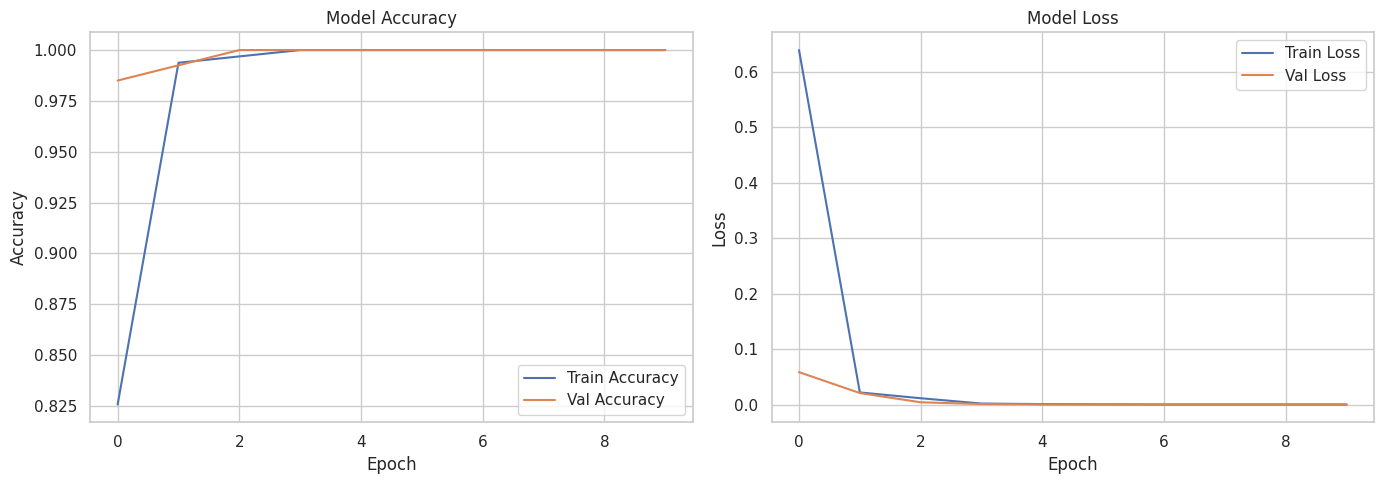

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(hist):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Pasted image.png to Pasted image.png


In [8]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = img.reshape(1, 64, 64, 1) / 255.0

# Predict
pred = model.predict(img)
predicted_class = gestures[np.argmax(pred)]
print(f"Predicted Gesture: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Gesture: 01_palm
